#**Trabajo Práctico N°1: Reservas de Hotel**
Organización de Datos (7506): cátedra Rodriguez

Grupo 25:
- Mariana Juarez Goldemberg - Padrón: 108441
- Lisandro Roman - Padrón: 107274
- Miranda Marenzi - Padrón: 109404

Checkpoint N°3

a. Construir un clasificador KNN optimizar sus hiperparámetros mediante k-fold
Cross Validation

b. Construir un clasificador SVM variando el kernel y los parámetros.

c. Construir un clasificador RF y optimizar sus hiperparámetros mediante k-fold
Cross Validation

d. Construir un clasificador XGBoost y optimizar sus hiperparámetros.

e. Construir un ensamble híbrido tipo Voting y otro tipo Stacking.

f. Evaluar la performance de todos los modelos en entrenamiento y validación,
explicar todas las métricas y mostrar la matriz de confusión.

g. Generar predicciones con el set de test y realizar los submits correspondientes en la competencia de Kaggle.

Importamos las librerías que necesitaremos a lo largo del trabajo, y los datasets.

In [ ]:
import pandas as pd
import numpy as np

import sklearn as sk
from sklearn.metrics import DistanceMetric

import matplotlib.pyplot as plt
import seaborn as sns

#KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#SVM
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#XGB

import xgboost as xgb
from sklearn.metrics import roc_auc_score

#Ensamble hibrido
from collections import defaultdict
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold


from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df_check1 = pd.read_csv('/content/sample_data/df_redefinido.csv')
df_test_check1 = pd.read_csv('/content/sample_data/dftest_redefinido.csv')
df_id = pd.read_csv('/content/sample_data/df_test_id.csv')

In [ ]:
df_train = df_check1.copy()
df_test = df_test_check1.copy()

df_test.drop(columns = ['reservation_status_date'], inplace = True)

df_trabajo_x=df_train.drop(['is_canceled'], axis='columns', inplace=False)
df_trabajo_y = df_train['is_canceled'].copy()
x_train, x_test, y_train, y_test = train_test_split(df_trabajo_x,
                                                    df_trabajo_y,
                                                    test_size=0.3,
                                                    random_state=9)

In [ ]:
features = ['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests',
       'total_people', 'total_days', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'deposit_type_Non Refund', 'deposit_type_Refundable', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'hotel_Resort Hotel',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'continent_America', 'continent_Asia',
       'continent_Europa', 'continent_Oceania']

In [ ]:
target = ["is_canceled"]

In [ ]:
df_train.shape

(57858, 47)

In [ ]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))

  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

##a. Clasificador KNN

El algoritmo K-Nearest Neighbors, KNN, es un algoritmo tal que dado un punto y evaluando sus "k" vecinos para encontrar similitudes, intenta predecir un atributo o propiedad de dicho punto. Se basa en que puntos de propiedades similares se encontrarán a poca distancia entre sí, en cambio, los que no son similares, estarán a mayor distancia.

Para una primer idea, crearemos un modelo con sus parámetros por defecto:

In [ ]:
KNN_Classifier = KNeighborsClassifier()

KNN_Classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Entre los hiperparámetros del clasificador tenemos:
- metric: tipo de distancia a calcular (en este caso usaremos Minkowski)
- weight: el peso de cada punto en función de la distancia (usaremos uniform, cada vecino tendrá el mismo peso)



Entrenamos el modelo con Cross Validation, y vemos cómo trabaja

In [ ]:
KNN_Classifier.fit(x_train, y_train)

y_pred = KNN_Classifier.predict(x_test)

In [ ]:
print('correctas: ', np.sum(y_test == y_pred))
print('total: ', len(y_test))

correctas:  12646
total:  17358


In [ ]:
accuracy_score(y_test,y_pred)

0.7285401543956677

###Búsqueda de mejores hiperparámetros

Veamos qué sucede cuando variamos la cantidad de vecinos

In [ ]:
from sklearn.model_selection import cross_val_score

k_range=range(1,30) #cantidad de vecinos a probar

k_scores=[] # accuracy para cada K utilizado

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

La cantidad de K-Neighbours no es el único hiperparámetro a mejorar, también tenemos a metric y weight (nombrados anteriormente) y algorithm (algoritmo utilizado para calcular los vecinos más cercanos).

Optimizamos los parámetros usando Random Search Cross Validation

In [ ]:
#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,30),
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

array([0.76587654, 0.73644444, 0.70881481, 0.68217284, 0.74883951,
       0.73809877, 0.72644444, 0.74190123, 0.77138272, 0.73846914])

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 19, 'metric': 'manhattan', 'algorithm': 'brute'}
0.7713827160493827


In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
accuracy_score(y_test,y_pred)

0.7741099204977532

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      8831
           1       0.75      0.82      0.78      8527

    accuracy                           0.77     17358
   macro avg       0.78      0.77      0.77     17358
weighted avg       0.78      0.77      0.77     17358



Text(50.722222222222214, 0.5, 'True')

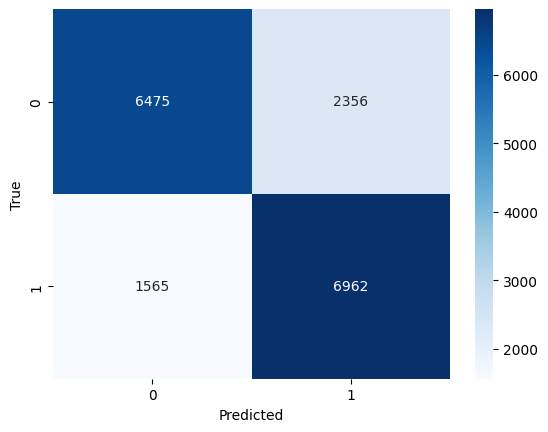

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

##b. Clasificador SVM

Reescalar los datos antes de usar un clasificador SVM a menudo mejora su rendimiento. Ayuda a garantizar que el modelo funcione de manera más eficiente y que los resultados sean más interpretables y confiables. Escalamos por min-max y con la normalización de los datos.

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax  = min_max_scaler.transform(x_test)

stand_scaler = preprocessing.StandardScaler()
x_train_norm = stand_scaler.fit_transform(x_train)
x_test_norm=stand_scaler.transform(x_test)

Construcción del modelo SVM

Modelo base: datos sin escalar.

              precision    recall  f1-score   support

           0       0.60      0.72      0.66      8831
           1       0.64      0.51      0.56      8527

    accuracy                           0.61     17358
   macro avg       0.62      0.61      0.61     17358
weighted avg       0.62      0.61      0.61     17358



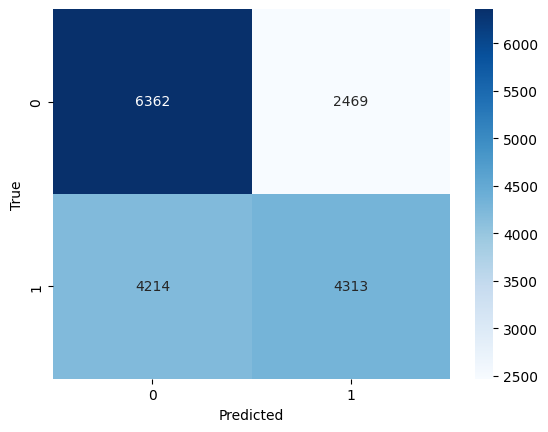

In [ ]:
#Construyo un modelo SVM
svm = SVC()

#Lo entreno con los datos sin escalar
svm.fit(x_train, y_train)

#Hago la prediccion y calculo las métricas
y_pred=svm.predict(x_test)
metricas(y_pred,y_test)

Modelo base: con datos escalados con normalización.

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      8831
           1       0.84      0.75      0.79      8527

    accuracy                           0.81     17358
   macro avg       0.81      0.81      0.81     17358
weighted avg       0.81      0.81      0.81     17358



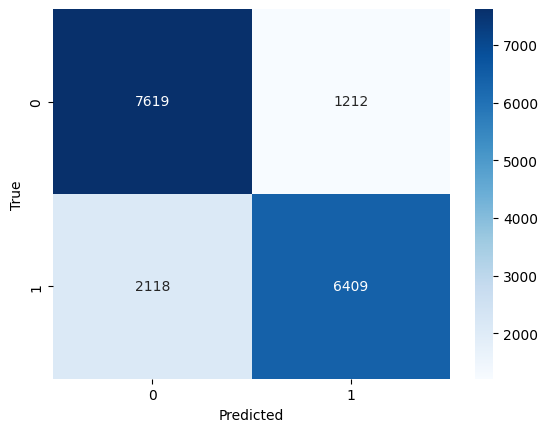

In [ ]:
#Construyo un modelo SVM
svm_norm= SVC()

#Lo entreno con los datos escalados con normalizacion
svm_norm.fit(x_train_norm, y_train)

#Hago la prediccion y calculo las métricas
y_pred_norm=svm_norm.predict(x_test_norm)
metricas(y_pred_norm,y_test)

Modelo base: escalados por min-max.

              precision    recall  f1-score   support

           0       0.76      0.85      0.81      8831
           1       0.83      0.73      0.77      8527

    accuracy                           0.79     17358
   macro avg       0.80      0.79      0.79     17358
weighted avg       0.80      0.79      0.79     17358



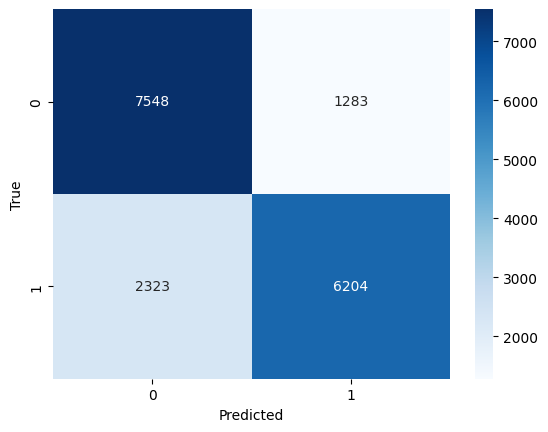

In [ ]:
#Construyo un modelo SVM
svm_minmax= SVC()

#Lo entreno con los datos escalados con min max
svm_minmax.fit(x_train_minmax, y_train)

#Hago la prediccion y calculo las métricas
y_pred_minmax=svm_minmax.predict(x_test_minmax)
metricas(y_pred_minmax,y_test)

###Kernel lineal

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      8831
           1       0.79      0.73      0.76      8527

    accuracy                           0.77     17358
   macro avg       0.77      0.77      0.77     17358
weighted avg       0.77      0.77      0.77     17358



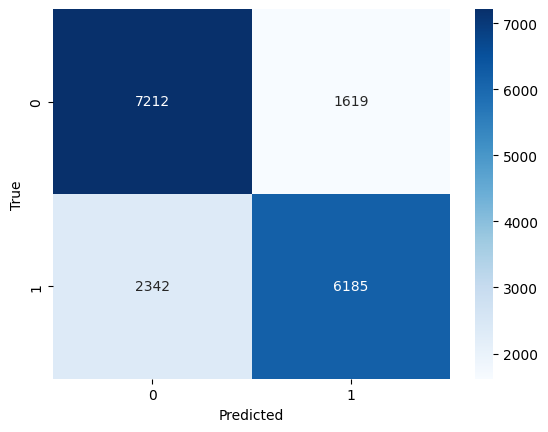

In [ ]:
#Creo un clasificador con kernel lineal y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='linear', C=5)
clf.fit(x_train_minmax, y_train)

#Hago la predicción y calculo las métricas
y_pred_lin=clf.predict(x_test_minmax)
metricas(y_pred_lin,y_test)

####Búsqueda de mejores hiperparámetros

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_dist = {'C': uniform(loc=0, scale=10)}
svm = SVC(kernel='linear')

#Busco hiperparametros
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5)
random_search.fit(x_train_minmax, y_train)

#Los guardo
best_params = random_search.best_params_

#Entreno el modelo
best_svm = SVC(kernel='linear', C=best_params['C'])
best_svm.fit(x_train_minmax, y_train)

SVC(C=7.3881933240009, kernel='linear')

              precision    recall  f1-score   support

           0       0.76      0.82      0.78      8831
           1       0.79      0.73      0.76      8527

    accuracy                           0.77     17358
   macro avg       0.77      0.77      0.77     17358
weighted avg       0.77      0.77      0.77     17358



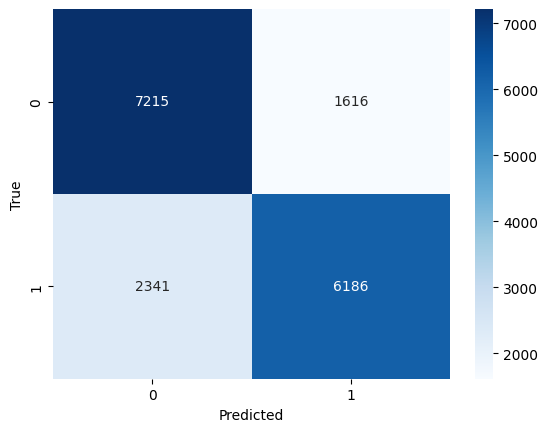

In [ ]:
#Hago la predicción y calculo las métricas
y_pred_lin_mejores_hiperparametros=best_svm.predict(x_test_minmax)
metricas(y_pred_lin_mejores_hiperparametros,y_test)

###Kernel radial

Hiperparametros:

* C : Parámetro de regularización.

* gamma: define cuánta influencia tiene un solo ejemplo de entrenamiento. Cuanto más grande es, más cerca deben estar otros ejemplos para verse afectados

La elección adecuada de C y gamma es fundamental para el rendimiento de la SVM. Se recomienda usar GridSearchCV con C y gamma espaciado exponencialmente para elegir buenos valores.

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      8831
           1       0.82      0.77      0.80      8527

    accuracy                           0.81     17358
   macro avg       0.81      0.81      0.81     17358
weighted avg       0.81      0.81      0.81     17358



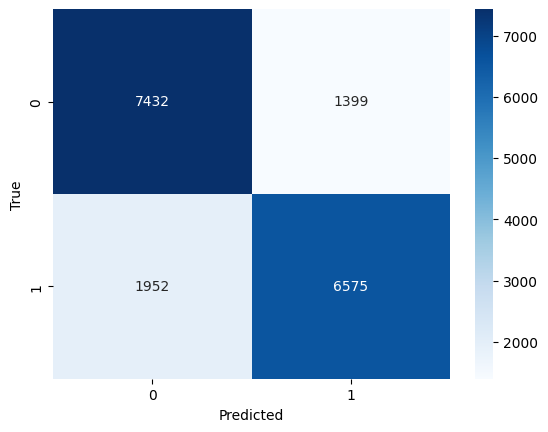

In [ ]:
#Creo un clasificador con kernel radial y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='rbf', C=5, gamma=10)
clf.fit(x_train_minmax, y_train)

#Hago la predicción y calculo las métricas
y_pred_rad=clf.predict(x_test_minmax)
metricas(y_pred_rad,y_test)

####Búsqueda de mejores hiperparámetros

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'C': [0.1, 1, 10],'gamma': [0.001, 0.01, 0.1, 1]}
svm = SVC(kernel='rbf')

#Busco los mejores hiperparametros
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5)
random_search.fit(x_train_minmax, y_train)

#Los guardo
best_params = random_search.best_params_

#Entreno el modelo
best_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm.fit(x_train_minmax, y_train)

SVC(C=10, gamma=1)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      8831
           1       0.83      0.79      0.81      8527

    accuracy                           0.82     17358
   macro avg       0.82      0.82      0.82     17358
weighted avg       0.82      0.82      0.82     17358



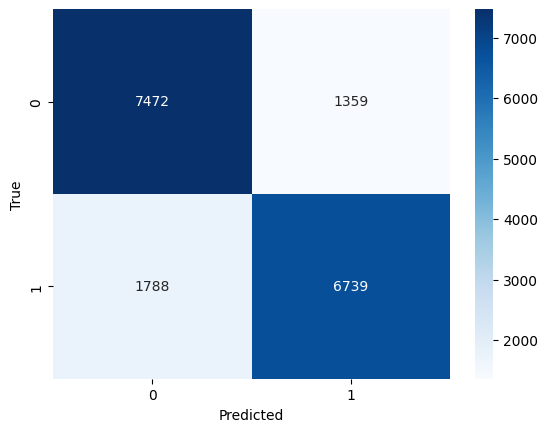

In [ ]:
#Hago la predicción y calculo las métricas
y_pred_rad_mejores_hiperparametros=best_svm.predict(x_test_minmax)
metricas(y_pred_rad_mejores_hiperparametros,y_test)

In [ ]:
y_pred = best_svm.predict(df_test)

In [ ]:
ds_resultados=pd.DataFrame(zip(df_id['id'],y_pred),columns=['id','is_canceled'])
ds_resultados.head(5)

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,0
1,aba9aac2-4495-4645-a60e-90328713c999,0
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,0
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,0


In [ ]:
ds_resultados.to_csv("prediccion_svm_radial_hotel.csv", index = False)

##c. Ensamble Random Forest

Basados en el bootstrap vamos a usar bagging. Es un método para reducir la varianza dado un conjunto de observaciones independientes: promediar un conjunto de observaciones reduce la varianza. Con bootstrap tomamos muestras repetidas de un único conjunto de entrenamiento

Vamos a construir un ensamble de árboles llamado random forest. Esto se hará tratando de construir árboles sin podar, que hagan overfitting, y cuando los promedio reduzco la varianza.

Un ensamble Bagging con Random Forest reduce la varianza en el modelo predictivo al promover la diversidad entre los árboles y combinar sus predicciones.

Vamos a tener un set de entrenamiento de n observaciones, tomamos una muestra de las observaciones de forma aleatoria y con reemplazo. Esta muestra construirá un arbol i.

Si existen M variables de entrada, eligo m (un subconjunto de esas variables) tal que m < M, y cada vez que hago un split en un nodo voy a considerar sólo ese subconjunto de variables para encontrar la mejor división para ramificar el árbol

El árbol crecerá hasta donde pueda. Se puede setear un ccp_alpha pero no es la idea.

m es una constante que se puede setear, su hiperparámetro se llama max_features.


Cada uno de los siguientes parámetros se puede setear:

In [ ]:
rfc_default = RandomForestClassifier()
rfc_default.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      8831
           1       0.86      0.79      0.83      8527

    accuracy                           0.84     17358
   macro avg       0.84      0.84      0.84     17358
weighted avg       0.84      0.84      0.84     17358



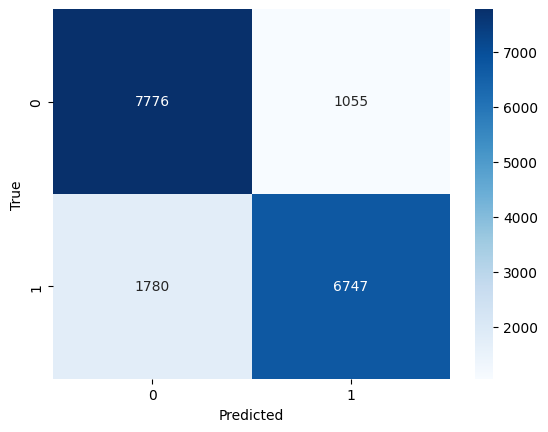

In [ ]:
#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(max_features='auto',
                             oob_score=True,
                             random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=5,
                             min_samples_split=5,
                             n_estimators=50 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

#Realizamos una predicción sobre el set de test
y_pred = model.predict(x_test)

metricas(y_pred,y_test)

In [ ]:
y_pred = model.predict(df_test)

In [ ]:
ds_resultados=pd.DataFrame(zip(df_id['id'],y_pred),columns=['id','is_canceled'])
ds_resultados.head(5)

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [ ]:
ds_resultados.shape

(26535, 2)

In [ ]:
ds_resultados.to_csv("prediccion_ensamble_RF_hotel.csv", index = False)

###Búsqueda de mejores hiperparámetros

In [ ]:
params_grid = {
    'n_estimators': list(range(50,200)),  # Número de árboles en el ensamble
    'max_features': ['auto', 'sqrt', 'log2'],  # Número máximo de características a considerar en cada división
    'min_samples_split': list(range(5,15)),  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': list(range(5,15)),  # Número mínimo de muestras requeridas en un nodo hoja
    'bootstrap': [True, False],  # Si se deben usar muestras de arranque en la construcción de árboles
    'criterion': ['gini', 'entropy']  # Función para medir la calidad de la división
    }

In [ ]:
#Clasificador RF
rfc_default = RandomForestClassifier(random_state=2, n_jobs=-1,)

#Random Search
randomcv = RandomizedSearchCV(rfc_default, params_grid, cv=20, scoring='f1', n_iter=30, random_state=5)

randomcv_prueba = randomcv.fit(x_train, y_train)

print(str(randomcv_prueba.best_params_))
print(str(randomcv_prueba.best_score_))

{'n_estimators': 64, 'min_samples_split': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}
0.8301613946294399


              precision    recall  f1-score   support

           0       0.82      0.88      0.85      8831
           1       0.87      0.80      0.83      8527

    accuracy                           0.84     17358
   macro avg       0.84      0.84      0.84     17358
weighted avg       0.84      0.84      0.84     17358



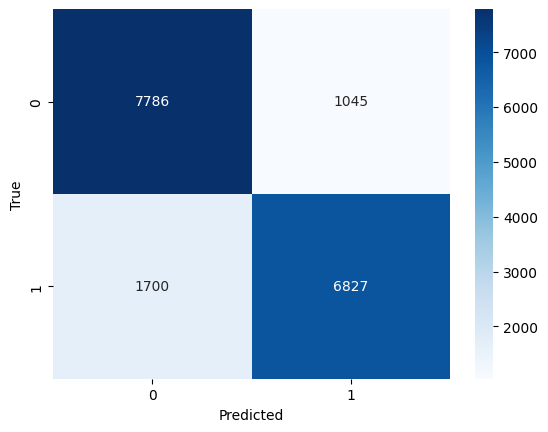

In [ ]:
rf_final = randomcv_prueba.best_estimator_

y_pred = rf_final.predict(x_test)

metricas(y_pred,y_test)

In [ ]:
y_pred = rf_final.predict(df_test)

In [ ]:
ds_resultados=pd.DataFrame(zip(df_id['id'],y_pred),columns=['id','is_canceled'])
ds_resultados.head(5)

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [ ]:
ds_resultados.to_csv("prediccion_ensamble_RF2_hotel.csv", index = False)

## d. Clasificador XGBoost

Está basado en boosting y construye un conjunto de árboles de forma secuencial, y cada uno se enfoca en corregir los errores de los anteriores. Incluye términos de regularización en la función de pérdida para controlar el sobreajuste y mejorar la generalización del modelo.


In [ ]:
#Creo el modelo y lo entreno

xgb_model = xgb.XGBClassifier(random_state=0, n_estimators=100)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      8831
           1       0.85      0.81      0.83      8527

    accuracy                           0.84     17358
   macro avg       0.84      0.84      0.84     17358
weighted avg       0.84      0.84      0.84     17358



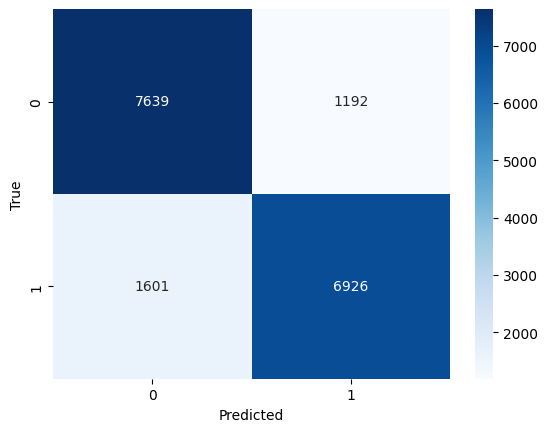

In [ ]:
#Evaluo en el set de test
y_pred_proba= xgb_model.predict_proba(x_test)[:, 1]

#Realizamos una predicción sobre el set de test
y_pred = xgb_model.predict(x_test)

metricas(y_pred,y_test)

In [ ]:
y_pred = xgb_model.predict(df_test)

In [ ]:
ds_resultados=pd.DataFrame(zip(df_id['id'],y_pred),columns=['id','is_canceled'])
ds_resultados.head(5)

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [ ]:
ds_resultados.shape

(26535, 2)

In [ ]:
ds_resultados.to_csv("prediccion_ensamble_XGB1_hotel.csv", index = False)

###Búsqueda de mejores hiperparámetros

**Hiper-parámetros**

* learning_rate: tasa de aprendizaje
+ max_depth: máxima profundidad de cada árbol
* subsample: porcentaje de muestras usadas para cada árbol (valor muy bajo, posible underfitting)
* colsample_bytree: porcentaje de features usadas para cada árbol (valores muy alto, posible overfitting)
* n_estimators: cantidad de árboles a construir.
* objective: función de error a utilizar (algunas: reg:linear para regresión, reg:logistic o binary:logistic para clasificación)

**Parámetros de regularización:**

* **gamma**: umbral para hacer split basado en la reducción de error de hacer el nuevo split.
* **alpha**: regularización para los pesos de las hojas. Un valor más alto genera una mayor regularización.
* **lambda**: similar alpha pero para la sintonia fina.

Cuando 𝛌 > 0 es más probable tener que podar un árbol, ya que los Gain (ganancia total) calculados son menores. Con lambda > 0, los Similarity Scores son mucho más chicos.
Aún eligiendo 𝜸 = 0 podemos tener que podar nodos, ya que la ganancia puede ser negativa.
𝛌=1 previene el sobreentrenamiento o sobreajuste del modelo en el conjunto de entrenamiento.

In [ ]:
params_grid = {
    'n_estimators': list(range(50,200)),
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_depth': list(range(10,25)),
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1],
}

La función objetivo mide cuán bien un modelo se ajusta a los datos y cómo se comporta en relación con los objetivos del problema. Su objetivo es proporcionar una medida cuantitativa que se puede optimizar durante el proceso de entrenamiento o ajuste del modelo.

Al modelo default le seteamos como objective 'binary:logistic'. Esta opción utiliza la función logística de pérdida logarítmica (log-loss) como función objetivo. Es una elección común para problemas de clasificación binaria.

In [ ]:
#Clasificador RF
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=0)

#Random Search con 10 Folds y 10 iteraciones
randomcv = RandomizedSearchCV(xgb_model, params_grid, cv=20, scoring='f1', n_iter=30, random_state=5)

randomcv_prueba = randomcv.fit(x_train, y_train)

print(str(randomcv_prueba.best_params_))
print(str(randomcv_prueba.best_score_))

{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 198, 'min_child_weight': 1, 'max_depth': 11, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
0.8457723008904221


In [ ]:
xgb_prueba =  xgb.XGBClassifier().set_params(**randomcv_prueba.best_params_)
xgb_prueba.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=198, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      8831
           1       0.86      0.84      0.85      8527

    accuracy                           0.85     17358
   macro avg       0.85      0.85      0.85     17358
weighted avg       0.85      0.85      0.85     17358



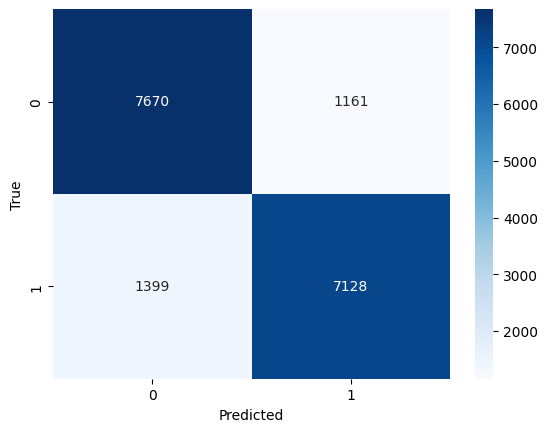

In [ ]:
y_pred = xgb_prueba.predict(x_test)

metricas(y_pred,y_test)

In [ ]:
y_pred = xgb_prueba.predict(df_test)

In [ ]:
ds_resultados=pd.DataFrame(zip(df_id['id'],y_pred),columns=['id','is_canceled'])
ds_resultados.head(5)

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [ ]:
ds_resultados.shape

(26535, 2)

In [ ]:
ds_resultados.to_csv("prediccion_ensamble_XGB2_hotel.csv", index = False)

##e. Ensamble híbrido



Ensemble Learning realiza una combinación estratégica de varios expertos o modelos ML con el fin de mejorar la eficacia obtenida utilizando un único modelo débil

###Stacking

La idea principal es entrenar varios modelos dado un conjunto de datos y a continuación entrenar uno nuevo que, cuando reciba una nueva instancia de datos, determinará qué modelo es el más adecuado para dicha instancia.


**Generación del conjunto de datos**

La función make_classification de Scikit-learn es útil para generar conjuntos de datos sintéticos que se pueden usar para probar diferentes algoritmos. El conjunto de datos que generaremos está diseñado para representar un problema de clasificación binaria basado en los siguientes parámetros:


* n_features: la cantidad de features en el conjunto de datos
* n_informative y n_redundant: la cantidad de características informativas y redundantes en el conjunto de datos.
* n_clusters_per_class: el número de clústeres incluidos en cada clase. Los valores más altos hacen que el problema sea más difícil.
* class_sep: controla la separación entre grupos/clases. Los valores más grandes facilitan la tarea.
* flip_y: especifica el porcentaje de etiquetas de clase que se asignarán al azar. Útil para agregar algo de ruido al conjunto de datos.

In [ ]:
#Creo un conjunto de datos para entrenar los modelos
x, y = make_classification(n_samples=3000,
                           n_features=20,
                           n_informative=15,
                           n_redundant=5,
                           n_clusters_per_class=5,
                           class_sep=0.7,
                           flip_y=0.03,
                           n_classes=2)

In [ ]:
#Funcion para evaluar los modelos 5fold -CV (repite 2 veces)
def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, verbose=1, n_jobs=3, error_score='raise')
    return scores

In [ ]:
#Funcion para plotear a performance
def plot_results(model_scores, name):

    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )

    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    showlegend=False)
    fig.show()

**Entrenamiento y evaluación de modelos individuales**

Para obtener un nivel de referencia de performance y poder compararlo con el ensamble, entrenaremos y evaluaremos individualmente los siguientes modelos base:

* Bosque aleatorio con 50 árboles de decisión (RF).
* Máquina de vectores de soporte (SVM)
* Clasificador K-vecinos más cercanos (KNN)

Cada uno de los modelos se evaluará utilizando una estrategia de validación cruzada de cinco folds repetida dos veces. En cada iteracion cada modelo se entrenó en el 80 % de los datos y se validó en el 20 % restante.

Este método da como resultado 10 puntajes de performance diferentes para cada modelo que se almacenarán en un diccionario.

In [ ]:
#Modelos Base
base_models = {'random_forest':RandomForestClassifier(n_estimators=50),
               'svm': SVC(),
               'knn': KNeighborsClassifier(n_neighbors=11)}


#Guarda los scores de cada modelo
model_scores = defaultdict()

#Entreno los clasificadores
for name, model in base_models.items():
    print('Evaluating {}'.format(name))
    scores = evaluate_model(model, x_train, y_train)
    model_scores[name] = scores

Evaluating random_forest


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   40.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Evaluating svm


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed: 20.5min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Evaluating knn


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   24.5s finished


In [ ]:
from sklearn.ensemble import StackingClassifier

#Modelos Base
base_models = [('random_forest', RandomForestClassifier(n_estimators=50)),
               ('svm', SVC()),
               ('knn', KNeighborsClassifier(n_neighbors=11))]

#Meta Modelo
meta_model = LogisticRegressionCV()

#Ensemble Stacking
stacking_model = StackingClassifier(estimators=base_models,
                                    final_estimator=meta_model,
                                    passthrough=True,
                                    cv=5,
                                    verbose=2)

In [ ]:
#Performance el modelo en entrenamiento
stacking_scores = evaluate_model(stacking_model, x_train, y_train)
model_scores['stacking'] = stacking_scores

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed: 92.7min finished


In [ ]:
#Grafico performance
plot_results(model_scores, name='stacking_model_cv')

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      8831
           1       0.86      0.82      0.84      8527

    accuracy                           0.85     17358
   macro avg       0.85      0.85      0.85     17358
weighted avg       0.85      0.85      0.85     17358



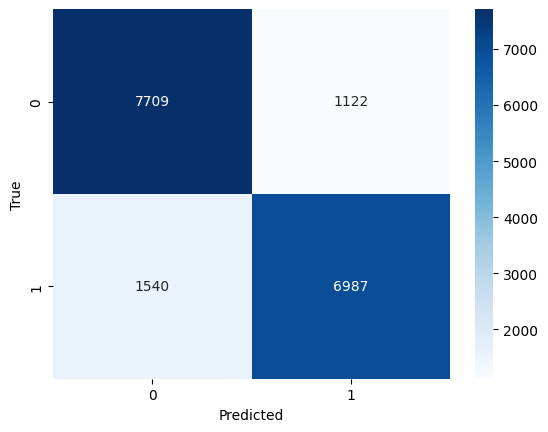

In [ ]:
#Evaluo en conjunto de test
stacking_model.fit(x_train,y_train)
y_pred = stacking_model.predict(x_test)
metricas(y_pred,y_test)

In [ ]:
y_pred = stacking_model.predict(df_test)

In [ ]:
ds_resultados=pd.DataFrame(zip(df_id['id'],y_pred),columns=['id','is_canceled'])
ds_resultados.head(5)

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [ ]:
ds_resultados.to_csv("prediccion_stacking_hotel.csv", index = False)

###Voting

Entrenar varios modelos distintos basados en el mismo dataset. La clasificación queda determinada por la mayoría.

El clasificador de votaciones tiene dos hiperparámetros básicos: estimadores y votaciones.

El hiperparámetro estimators crea una lista los clasificadores y les asigna nombres.

El hiperparámetro de votación se establece en "hard" o "soft".

* hard: el clasificador de votación usa las etiquetas de clase predichas para la votación por regla de la mayoría.

* soft: utilizará un enfoque ponderado para tomar su decisión (predice la etiqueta de clase en función del argmax de las sumas de las probabilidades predichas)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Creo un conjunto de datos para entrenar los modelos

x, y = make_classification(n_samples=3000,
                           n_features=46,
                           n_informative=15,
                           n_redundant=5,
                           n_clusters_per_class=5,
                           class_sep=0.7,
                           flip_y=0.03,
                           n_classes=2)

In [ ]:
#Creo clasificadores

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

#Creo ensemble de Votación
vot_clf = VotingClassifier(estimators = [('lr', log_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'hard')

#Armo conjunto entrenamiento y test 80-20
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.80)

#Entreno el ensemble
vot_clf.fit(x_train, y_train)

#Evaluo en conjunto de test
pred = vot_clf.predict(x_test)
accuracy_score(y_test, pred)

0.755

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       306
           1       0.76      0.72      0.74       294

    accuracy                           0.76       600
   macro avg       0.76      0.75      0.75       600
weighted avg       0.76      0.76      0.75       600



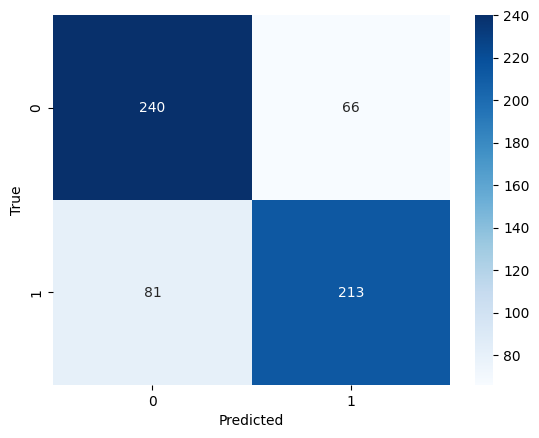

In [ ]:
metricas(pred,y_test)

In [ ]:
y_pred = vot_clf.predict(df_test)

In [ ]:
ds_resultados=pd.DataFrame(zip(df_id['id'],y_pred),columns=['id','is_canceled'])
ds_resultados.head(5)

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,0
1,aba9aac2-4495-4645-a60e-90328713c999,0
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,0
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,0


In [ ]:
ds_resultados.to_csv("prediccion_voting_hotel.csv", index = False)

##Conclusión

Observemos, para un mejor análisis, los clasificadores junto con los valores de todas sus métricas en una tabla, de forma tal que sea más sencillo compararlos.

Recordemos qué significa cada métrica:
- **accuracy**: número de elementos clasificados correctamente en comparación con el número total.
- **recall**: cantidad de verdaderos positivos que el modelo clasificó en función del número total de valores positivos.
- **precision**: número de verdaderos positivos que son realmente positivos en comparación con el número total de valores positivos predichos.
- **F1-score**: combinación de recall y precision.

Para nuestro caso, evaluamos entre 2 valores posibles (0 - reserva no cancelada y 1 - reserva cancelada), obteniendo la siguiente tabla.

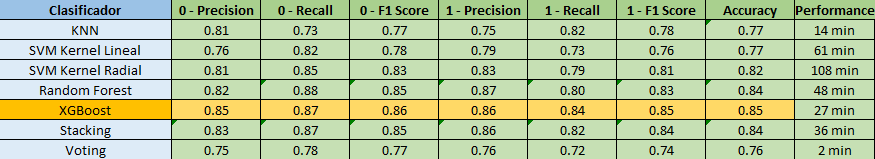

Como podemos observar, obtuvimos la mejor clasificación, utilizando el clasificador XGBoost, siendo este el que nos ha dado el mejor score ejecutándose relativamente en un tiempo que podemos no considerar extenso, como se analizó anteriormente.